In [1]:
import pandas as pd
import glob

# CICIDS2017 veri setindeki tüm CSV dosyalarının yolunu listeleyin
csv_files = [
    "Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv",  # Dosya yollarını buraya ekleyin
    "Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv",
    "Friday-WorkingHours-Morning.pcap_ISCX.csv",
    "Monday-WorkingHours.pcap_ISCX.csv",
    "Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv",
    "Tuesday-WorkingHours.pcap_ISCX.csv",
    "Wednesday-workingHours.pcap_ISCX.csv"
]

# Ortak veri setini tutmak için boş bir liste oluşturun
data_frames = []

# Her CSV dosyasından 50.000 satır çekin
for file in csv_files:
    print(f"Reading file: {file}")
    df = pd.read_csv(file)  # CSV dosyasını okuyun
    df_sample = df.sample(n=50000, random_state=42)  # 50.000 rastgele satır seçin
    data_frames.append(df_sample)  # Listeye ekleyin
    
# Tüm veri çerçevelerini birleştirin
combinedsvm_data = pd.concat(data_frames, ignore_index=True)
df_new=pd.DataFrame(combinedsvm_data)
# Birleştirilmiş veri setini bir CSV dosyasına kaydedin
df_new.to_csv("combinedsvm_dataset.csv", index=False)
print("Birleştirilmiş veri seti kaydedildi: combinedsvm_dataset.csv")

Reading file: Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv
Reading file: Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv
Reading file: Friday-WorkingHours-Morning.pcap_ISCX.csv
Reading file: Monday-WorkingHours.pcap_ISCX.csv
Reading file: Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv
Reading file: Tuesday-WorkingHours.pcap_ISCX.csv
Reading file: Wednesday-workingHours.pcap_ISCX.csv
Birleştirilmiş veri seti kaydedildi: combinedsvm_dataset.csv


In [2]:
# Veri setindeki eksik değerleri kontrol et
print("Eksik Değer Kontrolü:")
print(combinedsvm_data.isnull().sum())

# Veri türlerini kontrol et
print("\nVeri Türleri:")
print(combinedsvm_data.dtypes)

# Kategorik ve sayısal sütunları belirle
categorical_columns = combinedsvm_data.select_dtypes(include=['object']).columns
numeric_columns = combinedsvm_data.select_dtypes(include=['int64', 'float64']).columns

print("\nKategorik Sütunlar:", categorical_columns)
print("Sayısal Sütunlar:", numeric_columns)

Eksik Değer Kontrolü:
 Destination Port              0
 Flow Duration                 0
 Total Fwd Packets             0
 Total Backward Packets        0
Total Length of Fwd Packets    0
                              ..
Idle Mean                      0
 Idle Std                      0
 Idle Max                      0
 Idle Min                      0
 Label                         0
Length: 79, dtype: int64

Veri Türleri:
 Destination Port                int64
 Flow Duration                   int64
 Total Fwd Packets               int64
 Total Backward Packets          int64
Total Length of Fwd Packets      int64
                                ...   
Idle Mean                      float64
 Idle Std                      float64
 Idle Max                        int64
 Idle Min                        int64
 Label                          object
Length: 79, dtype: object



Kategorik Sütunlar: Index([' Label'], dtype='object')
Sayısal Sütunlar: Index([' Destination Port', ' Flow Duration', ' Total Fwd Packets',
       ' Total Backward Packets', 'Total Length of Fwd Packets',
       ' Total Length of Bwd Packets', ' Fwd Packet Length Max',
       ' Fwd Packet Length Min', ' Fwd Packet Length Mean',
       ' Fwd Packet Length Std', 'Bwd Packet Length Max',
       ' Bwd Packet Length Min', ' Bwd Packet Length Mean',
       ' Bwd Packet Length Std', 'Flow Bytes/s', ' Flow Packets/s',
       ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max', ' Flow IAT Min',
       'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std', ' Fwd IAT Max',
       ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean', ' Bwd IAT Std',
       ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags', ' Bwd PSH Flags',
       ' Fwd URG Flags', ' Bwd URG Flags', ' Fwd Header Length',
       ' Bwd Header Length', 'Fwd Packets/s', ' Bwd Packets/s',
       ' Min Packet Length', ' Max Packet Length', ' Packe

In [3]:
# Kategorik ve sayısal sütunları kontrol et
categorical_columns = combinedsvm_data.select_dtypes(include=['object']).columns
numeric_columns = combinedsvm_data.select_dtypes(include=['int64', 'float64']).columns

print("\nKategorik Sütunlar:", list(categorical_columns))
print("\nSayısal Sütunlar:", list(numeric_columns))



Kategorik Sütunlar: [' Label']

Sayısal Sütunlar: [' Destination Port', ' Flow Duration', ' Total Fwd Packets', ' Total Backward Packets', 'Total Length of Fwd Packets', ' Total Length of Bwd Packets', ' Fwd Packet Length Max', ' Fwd Packet Length Min', ' Fwd Packet Length Mean', ' Fwd Packet Length Std', 'Bwd Packet Length Max', ' Bwd Packet Length Min', ' Bwd Packet Length Mean', ' Bwd Packet Length Std', 'Flow Bytes/s', ' Flow Packets/s', ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max', ' Flow IAT Min', 'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std', ' Fwd IAT Max', ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean', ' Bwd IAT Std', ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags', ' Bwd PSH Flags', ' Fwd URG Flags', ' Bwd URG Flags', ' Fwd Header Length', ' Bwd Header Length', 'Fwd Packets/s', ' Bwd Packets/s', ' Min Packet Length', ' Max Packet Length', ' Packet Length Mean', ' Packet Length Std', ' Packet Length Variance', 'FIN Flag Count', ' SYN Flag Count', ' RST Flag Count'

In [4]:
# Tamamen eksik olan sütunu veri setinden çıkarma
combined_data = combinedsvm_data.drop(columns=['Total Length of Fwd Packets'])

print("Güncellenmiş veri seti sütunları:")
print(combined_data.columns)

Güncellenmiş veri seti sütunları:
Index([' Destination Port', ' Flow Duration', ' Total Fwd Packets',
       ' Total Backward Packets', ' Total Length of Bwd Packets',
       ' Fwd Packet Length Max', ' Fwd Packet Length Min',
       ' Fwd Packet Length Mean', ' Fwd Packet Length Std',
       'Bwd Packet Length Max', ' Bwd Packet Length Min',
       ' Bwd Packet Length Mean', ' Bwd Packet Length Std', 'Flow Bytes/s',
       ' Flow Packets/s', ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max',
       ' Flow IAT Min', 'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std',
       ' Fwd IAT Max', ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean',
       ' Bwd IAT Std', ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags',
       ' Bwd PSH Flags', ' Fwd URG Flags', ' Bwd URG Flags',
       ' Fwd Header Length', ' Bwd Header Length', 'Fwd Packets/s',
       ' Bwd Packets/s', ' Min Packet Length', ' Max Packet Length',
       ' Packet Length Mean', ' Packet Length Std', ' Packet Length Variance',
     

In [5]:
# Veri setindeki eksik değerleri kontrol et
print("Eksik Değer Kontrolü:")
print(combinedsvm_data.isnull().sum())

Eksik Değer Kontrolü:
 Destination Port              0
 Flow Duration                 0
 Total Fwd Packets             0
 Total Backward Packets        0
Total Length of Fwd Packets    0
                              ..
Idle Mean                      0
 Idle Std                      0
 Idle Max                      0
 Idle Min                      0
 Label                         0
Length: 79, dtype: int64


In [6]:
# Kategorik ve sayısal sütunları kontrol et
categorical_columns = combinedsvm_data.select_dtypes(include=['object']).columns
numeric_columns = combinedsvm_data.select_dtypes(include=['int64', 'float64']).columns

print("\nKategorik Sütunlar:", list(categorical_columns))
print("\nSayısal Sütunlar:", list(numeric_columns))


Kategorik Sütunlar: [' Label']

Sayısal Sütunlar: [' Destination Port', ' Flow Duration', ' Total Fwd Packets', ' Total Backward Packets', 'Total Length of Fwd Packets', ' Total Length of Bwd Packets', ' Fwd Packet Length Max', ' Fwd Packet Length Min', ' Fwd Packet Length Mean', ' Fwd Packet Length Std', 'Bwd Packet Length Max', ' Bwd Packet Length Min', ' Bwd Packet Length Mean', ' Bwd Packet Length Std', 'Flow Bytes/s', ' Flow Packets/s', ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max', ' Flow IAT Min', 'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std', ' Fwd IAT Max', ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean', ' Bwd IAT Std', ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags', ' Bwd PSH Flags', ' Fwd URG Flags', ' Bwd URG Flags', ' Fwd Header Length', ' Bwd Header Length', 'Fwd Packets/s', ' Bwd Packets/s', ' Min Packet Length', ' Max Packet Length', ' Packet Length Mean', ' Packet Length Std', ' Packet Length Variance', 'FIN Flag Count', ' SYN Flag Count', ' RST Flag Count'

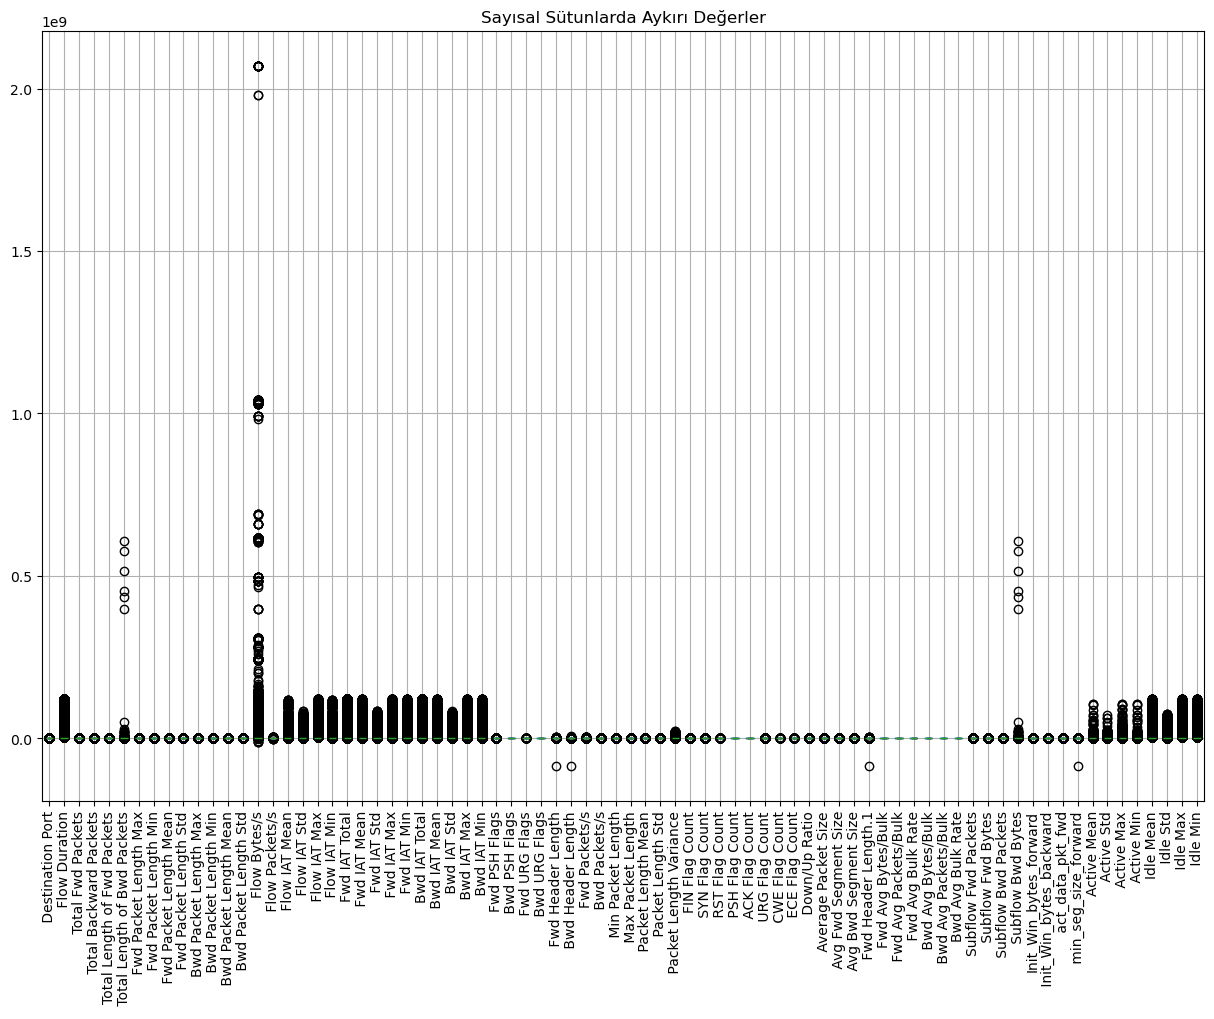

In [7]:
import matplotlib.pyplot as plt

# Boxplot ile sayısal sütunların dağılımını görselleştir
plt.figure(figsize=(15, 10))  # Grafiğin boyutunu ayarla
combinedsvm_data[numeric_columns].boxplot(rot=90)  # Tüm sayısal sütunların boxplot'unu oluştur
plt.title("Sayısal Sütunlarda Aykırı Değerler")  # Başlık ekle
plt.show()  # Grafiği göster

In [8]:
# Her sütun için aykırı değerlerin sınıf dağılımını kontrol et
for col in numeric_columns:
    # Sütundaki aykırı değerleri filtrele
    Q1 = combinedsvm_data[col].quantile(0.25)
    Q3 = combinedsvm_data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = max(Q1 - 1.5 * IQR, 0)  # Alt sınır (negatif olmamalı)
    upper_limit = Q3 + 1.5 * IQR  # Üst sınır
    
    # Aykırı değerler
    outliers = combinedsvm_data[(combinedsvm_data[col] < lower_limit) | 
                             (combinedsvm_data[col] > upper_limit)]
    
    # Aykırı değerlerin sınıf dağılımı
    class_distribution = outliers[' Label'].value_counts()
    print(f"{col} sütunundaki aykırı değerlerin sınıf dağılımı:")
    print(class_distribution)
    print("\n")


 Destination Port sütunundaki aykırı değerlerin sınıf dağılımı:
 Label
BENIGN      59123
PortScan    16108
Bot           481
DDoS            1
Name: count, dtype: int64


 Flow Duration sütunundaki aykırı değerlerin sınıf dağılımı:
 Label
BENIGN              54984
DDoS                11634
DoS Hulk            10161
DoS GoldenEye         696
FTP-Patator           435
SSH-Patator           342
DoS Slowhttptest      331
DoS slowloris         236
PortScan               58
Infiltration            5
Heartbleed              2
Bot                     1
Name: count, dtype: int64


 Total Fwd Packets sütunundaki aykırı değerlerin sınıf dağılımı:
 Label
BENIGN              41530
DoS Hulk             1755
DDoS                  861
FTP-Patator           435
SSH-Patator           344
DoS slowloris         127
DoS GoldenEye          95
DoS Slowhttptest       21
Bot                    10
Infiltration            4
Heartbleed              2
Name: count, dtype: int64


 Total Backward Packets sütunundaki

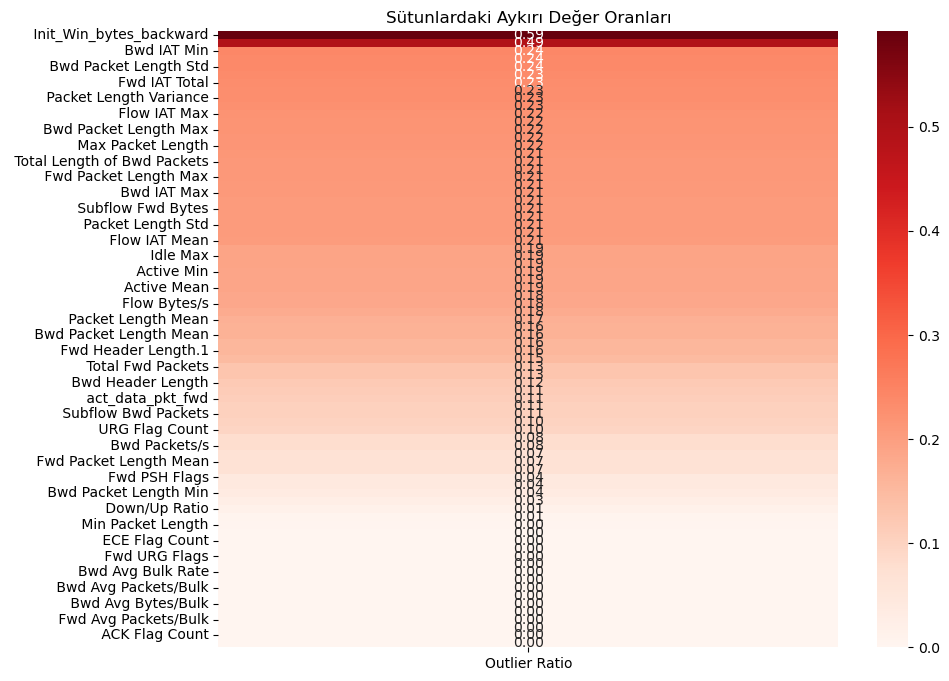

In [9]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Aykırı değer oranlarını hesapla
outlier_ratios = {}
for col in numeric_columns:
    Q1 = combinedsvm_data[col].quantile(0.25)
    Q3 = combinedsvm_data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = max(Q1 - 1.5 * IQR, 0)
    upper_limit = Q3 + 1.5 * IQR
    outliers = combinedsvm_data[(combinedsvm_data[col] < lower_limit) | (combinedsvm_data[col] > upper_limit)]
    outlier_ratios[col] = len(outliers) / len(combinedsvm_data)

# Isı haritası için veri çerçevesi oluştur
outlier_df = pd.DataFrame.from_dict(outlier_ratios, orient='index', columns=['Outlier Ratio'])
outlier_df.sort_values(by='Outlier Ratio', ascending=False, inplace=True)

# Isı haritasını çiz
plt.figure(figsize=(10, 8))
sns.heatmap(outlier_df, annot=True, cmap="Reds", cbar=True, fmt=".2f")
plt.title("Sütunlardaki Aykırı Değer Oranları")
plt.show()

<Figure size 1200x600 with 0 Axes>

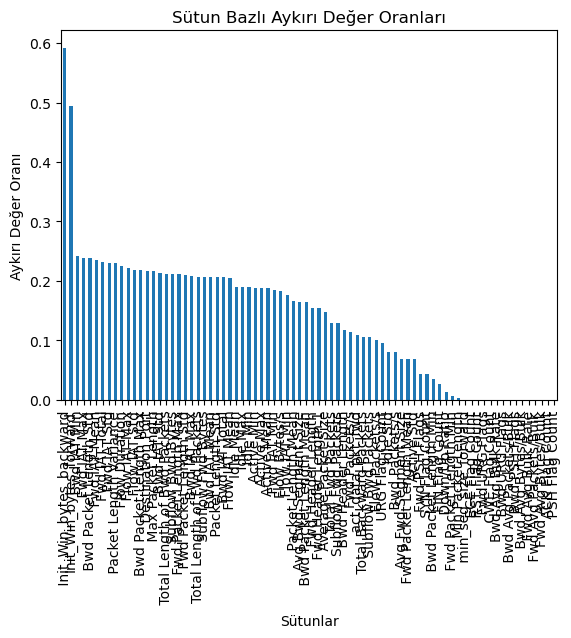

In [10]:
# Bar grafiği oluştur
plt.figure(figsize=(12, 6))
outlier_df.plot(kind='bar', legend=False)
plt.title("Sütun Bazlı Aykırı Değer Oranları")
plt.xlabel("Sütunlar")
plt.ylabel("Aykırı Değer Oranı")
plt.xticks(rotation=90)
plt.show()


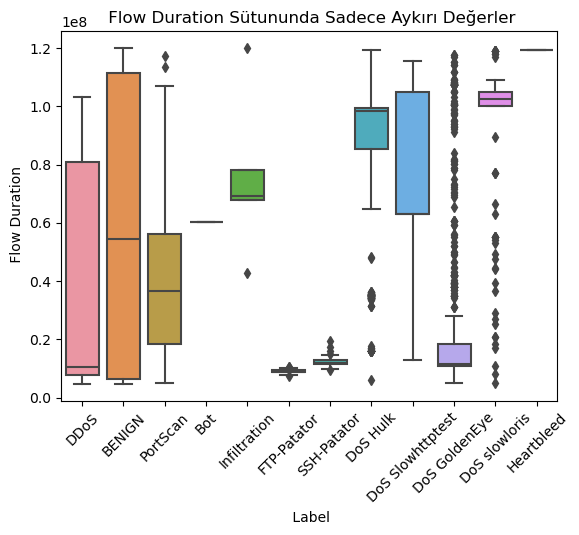

In [11]:
# Aykırı değerleri filtrele
import seaborn as sns

Q1 = combinedsvm_data[' Flow Duration'].quantile(0.25)
Q3 = combinedsvm_data[' Flow Duration'].quantile(0.75)
IQR = Q3 - Q1
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

outliers = combinedsvm_data[(combinedsvm_data[' Flow Duration'] < lower_limit) | 
                         (combinedsvm_data[' Flow Duration'] > upper_limit)]

sns.boxplot(x=' Label', y=' Flow Duration', data=outliers)
plt.title(" Flow Duration Sütununda Sadece Aykırı Değerler")
plt.xticks(rotation=45)
plt.show()

In [12]:
# # IQR hesaplama (Standart Q1 ve Q3 kullanımı)
# Q1 = df_new[" Total Length of Bwd Packets"].quantile(0.20)  # 1. çeyrek
# Q3 = df_new[" Total Length of Bwd Packets"].quantile(0.80)  # 3. çeyrek
# IQR_TotalLengthofBwdPackets = Q3 - Q1  # IQR hesaplama
 
# # Alt ve üst sınırların belirlenmesi
# alt_limit_TotalLengthofBwdPackets = Q1 - (1.5 * IQR_TotalLengthofBwdPackets)
# ust_limit_TotalLengthofBwdPackets = Q3 + (6.5 * IQR_TotalLengthofBwdPackets)
 
# # Alt ve üst sınırların yazdırılması
# print(f"Alt Limit: {alt_limit_TotalLengthofBwdPackets}")
# print(f"Üst Limit: {ust_limit_TotalLengthofBwdPackets}")

# IQR hesaplama (Standart Q1 ve Q3 kullanımı)
Q1 = df_new[" Total Length of Bwd Packets"].quantile(0.25)  # 1. çeyrek
Q3 = df_new[" Total Length of Bwd Packets"].quantile(0.75)  # 3. çeyrek
IQR_TotalLengthofBwdPackets = Q3 - Q1  # IQR hesaplama

# Alt ve üst sınırların belirlenmesi
alt_limit_TotalLengthofBwdPackets = max(Q1 - (1.5 * IQR_TotalLengthofBwdPackets), 0)  # Negatif olmamalı
ust_limit_TotalLengthofBwdPackets = Q3 + (3 * IQR_TotalLengthofBwdPackets)  # Üst sınır genişletildi

# Alt ve üst sınırların yazdırılması
print(f"Alt Limit: {alt_limit_TotalLengthofBwdPackets}")
print(f"Üst Limit: {ust_limit_TotalLengthofBwdPackets}")

# Üst sınırın üstünde kalan veri sayısı
outliers_count = (df_new[" Total Length of Bwd Packets"] > ust_limit_TotalLengthofBwdPackets).sum()
print(f"Üst sınırın üstünde kalan veri sayısı: {outliers_count}")

# Filtreleme
filtered_data = df_new[df_new[" Total Length of Bwd Packets"] <= ust_limit_TotalLengthofBwdPackets]
print(f"Filtrelenmiş veri setinin boyutu: {filtered_data.shape}")

 
 
 

Alt Limit: 0
Üst Limit: 1646.0
Üst sınırın üstünde kalan veri sayısı: 71657
Filtrelenmiş veri setinin boyutu: (278343, 79)


In [13]:
outliers_count = (df_new[" Total Length of Bwd Packets"] > ust_limit_TotalLengthofBwdPackets).sum()
print(f"Üst sınırın üstünde kalan veri sayısı: {outliers_count}")


Üst sınırın üstünde kalan veri sayısı: 71657


In [14]:
negatif_oran = (df_new[" Total Length of Bwd Packets"] < 0).mean()
print(f"Negatif değer oranı: {negatif_oran:.2%}")


Negatif değer oranı: 0.00%


In [15]:
alt_limit_TotalLengthofBwdPackets = max(alt_limit_TotalLengthofBwdPackets, 0)
print(f"Güncellenmiş Alt Limit: {alt_limit_TotalLengthofBwdPackets}")


Güncellenmiş Alt Limit: 0


In [16]:
# Alt ve üst sınırların yazdırılması
print(f"Alt Limit: {alt_limit_TotalLengthofBwdPackets}")
print(f"Üst Limit: {ust_limit_TotalLengthofBwdPackets}")
 

Alt Limit: 0
Üst Limit: 1646.0


In [17]:
print(df_new[" Total Length of Bwd Packets"].mean())
print(df_new[" Total Length of Bwd Packets"].max())
print(df_new[" Total Length of Bwd Packets"].min())


14490.594877142858
607000000
0


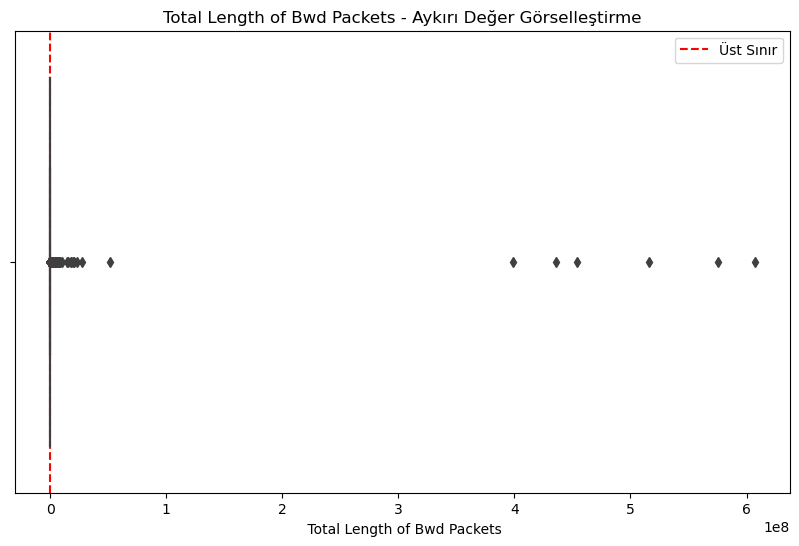

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot çizimi
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_new[" Total Length of Bwd Packets"])
plt.axvline(x=ust_limit_TotalLengthofBwdPackets, color='r', linestyle='--', label='Üst Sınır')
plt.title("Total Length of Bwd Packets - Aykırı Değer Görselleştirme")
plt.legend()
plt.show()


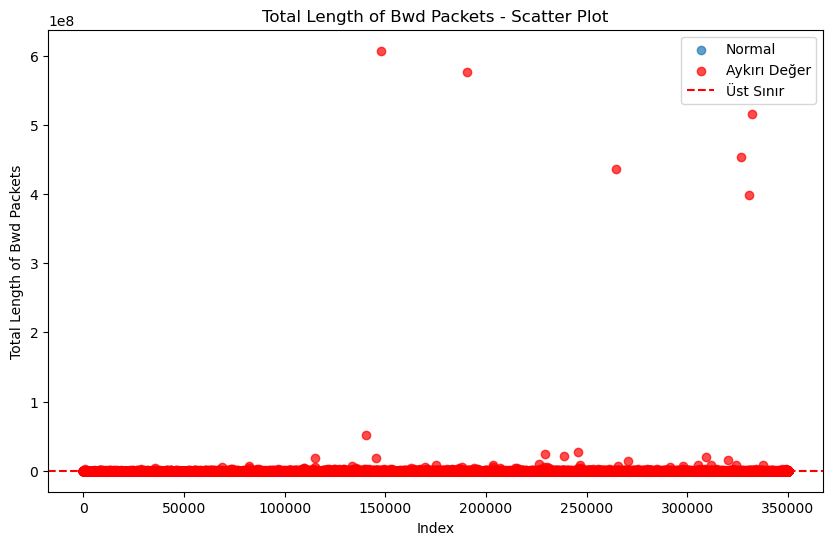

In [19]:
# Aykırı ve normal değerler için renkli scatter plot
outliers = df_new[df_new[" Total Length of Bwd Packets"] > ust_limit_TotalLengthofBwdPackets]
normal_values = df_new[df_new[" Total Length of Bwd Packets"] <= ust_limit_TotalLengthofBwdPackets]

plt.figure(figsize=(10, 6))
plt.scatter(normal_values.index, normal_values[" Total Length of Bwd Packets"], label="Normal", alpha=0.7)
plt.scatter(outliers.index, outliers[" Total Length of Bwd Packets"], color='r', label="Aykırı Değer", alpha=0.7)
plt.axhline(y=ust_limit_TotalLengthofBwdPackets, color='r', linestyle='--', label='Üst Sınır')
plt.title("Total Length of Bwd Packets - Scatter Plot")
plt.xlabel("Index")
plt.ylabel("Total Length of Bwd Packets")
plt.legend()
plt.show()


In [20]:
#Flow Bytes/s, bir ağ trafiği akışında birim zamanda geçen bayt miktarını ifade eder.
# Bu, ağ performansını ve bant genişliği kullanımını analiz etmek için önemli bir metriktir.
import numpy as np
# Hedef sütundaki inf ve -inf değerlerini NaN ile değiştirme
df_new["Flow Bytes/s"] = df_new["Flow Bytes/s"].replace([float('inf'), float('-inf')], np.nan)
print(df_new["Flow Bytes/s"].isna().sum())

295


In [21]:
df_new["Flow Bytes/s"]=df_new["Flow Bytes/s"].fillna(df_new["Flow Bytes/s"].mean())
print(df_new["Flow Bytes/s"].isna().sum())

0


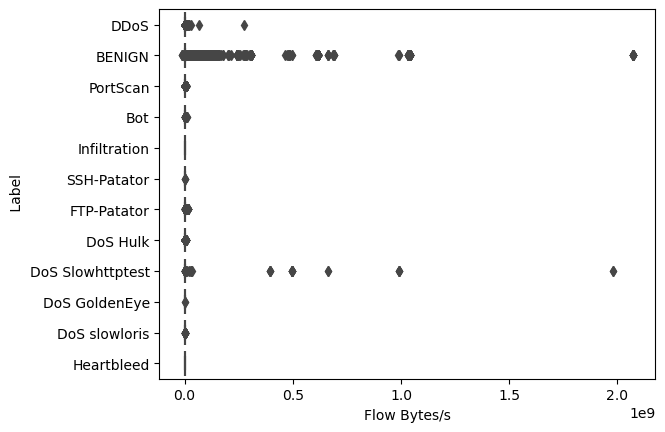

1387159.6059720917
2071000000.0


In [22]:
import seaborn as sns
sns.boxplot(x="Flow Bytes/s",y=" Label",data=df_new)
plt.show()
print(df_new["Flow Bytes/s"].mean())
print(df_new["Flow Bytes/s"].max())

In [23]:
# IQR hesaplama (Standart Q1 ve Q3 kullanımı)
Q1 = df_new["Flow Bytes/s"].quantile(0.20)  # 1. çeyrek
Q3 = df_new["Flow Bytes/s"].quantile(0.80)  # 3. çeyrek
IQR_FlowBytes = Q3 - Q1  # IQR hesaplama
 
# Alt ve üst sınırların belirlenmesi
alt_limit_FlowBytes = Q1 - (0* IQR_FlowBytes)
ust_limit_FlowBytes = Q3 + (6 * IQR_FlowBytes)
 
# Alt ve üst sınırların yazdırılması
print(f"Alt Limit: {alt_limit_FlowBytes}")
print(f"Üst Limit: {ust_limit_FlowBytes}")
 

Alt Limit: 43.25737420200001
Üst Limit: 2333073.788854788


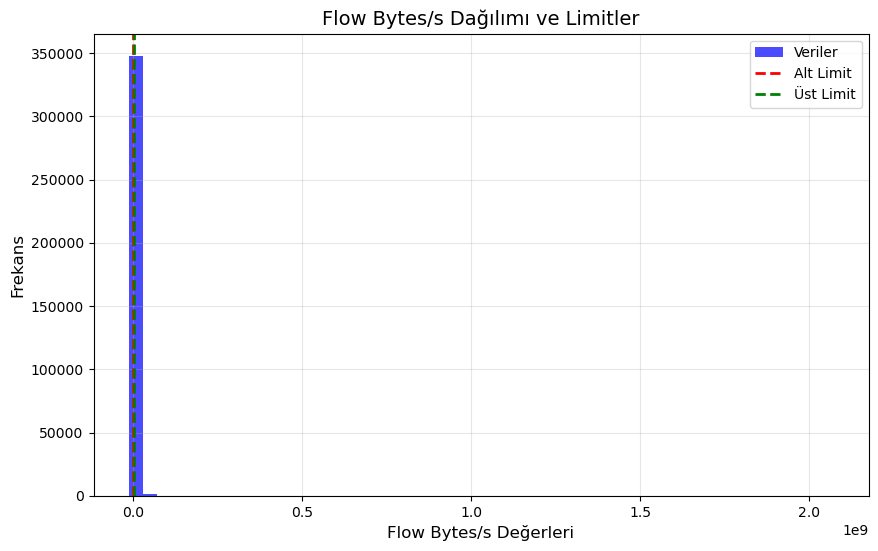

In [24]:
import matplotlib.pyplot as plt

# Veriyi ve alt/üst limitleri al
data = df_new["Flow Bytes/s"]
alt_limit = alt_limit_FlowBytes
ust_limit = ust_limit_FlowBytes

# Histogram çiz
plt.figure(figsize=(10, 6))
plt.hist(data, bins=50, color='blue', alpha=0.7, label='Veriler')

# Alt ve üst limitleri çiz
plt.axvline(alt_limit, color='red', linestyle='--', linewidth=2, label='Alt Limit')
plt.axvline(ust_limit, color='green', linestyle='--', linewidth=2, label='Üst Limit')

# Grafik detayları
plt.title("Flow Bytes/s Dağılımı ve Limitler", fontsize=14)
plt.xlabel("Flow Bytes/s Değerleri", fontsize=12)
plt.ylabel("Frekans", fontsize=12)
plt.legend()
plt.grid(alpha=0.3)

# Grafiği göster
plt.show()


In [25]:
# IQR hesaplama (Standart Q1 ve Q3 kullanımı)
Q1 = df_new[" Fwd Header Length"].quantile(0.25)  # 1. çeyrek
Q3 = df_new[" Fwd Header Length"].quantile(0.75)  # 3. çeyrek
IQR_FwdHeaderLength = Q3 - Q1  # IQR hesaplama
 
# Alt ve üst sınırların belirlenmesi
alt_limit_FwdHeaderLength = Q1 - (0.6666* IQR_FwdHeaderLength)
ust_limit_FwdHeaderLength = Q3 + (10 * IQR_FwdHeaderLength)
 
# Alt ve üst sınırların yazdırılması
print(f"Alt Limit: {alt_limit_FwdHeaderLength}")
print(f"Üst Limit: {ust_limit_FwdHeaderLength}")

# Bwd Header Length

Alt Limit: 0.0040000000000048885
Üst Limit: 700.0


In [26]:
ust_limit_FwdHeaderLength = min(ust_limit_FwdHeaderLength, 150)  # Maksimum 150 bayt ile sınırlandır


In [27]:
alt_limit_FwdHeaderLength = max(alt_limit_FwdHeaderLength, 0)
print(f"Güncellenmiş Alt Limit: {alt_limit_FwdHeaderLength}")


Güncellenmiş Alt Limit: 0.0040000000000048885


In [28]:
# Alt ve üst sınırların yazdırılması
print(f"Alt Limit: {alt_limit_FwdHeaderLength}")
print(f"Üst Limit: {ust_limit_FwdHeaderLength}")

Alt Limit: 0.0040000000000048885
Üst Limit: 150


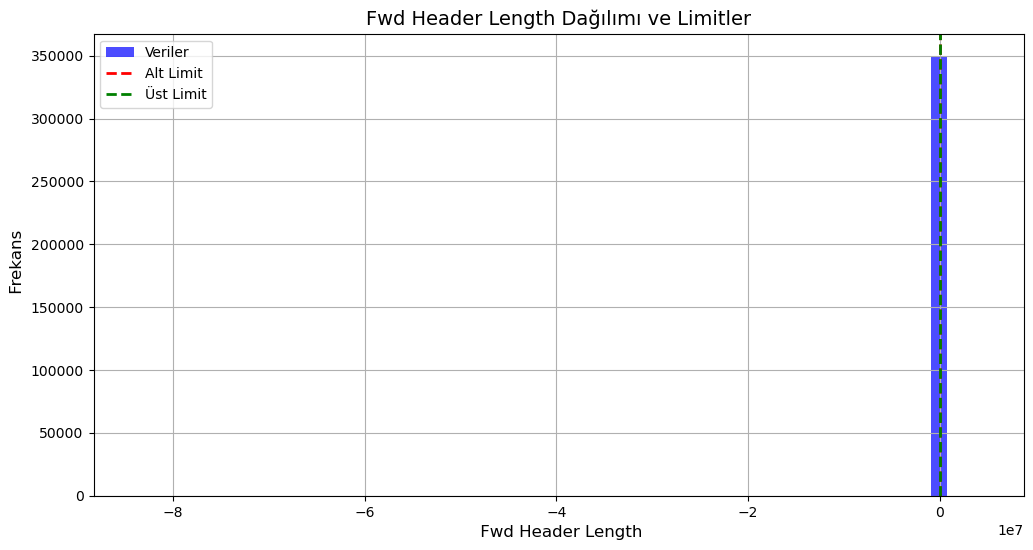

In [29]:
import matplotlib.pyplot as plt

# Verileri histogram olarak görselleştirin
plt.figure(figsize=(12, 6))
plt.hist(df_new[" Fwd Header Length"], bins=50, color='blue', alpha=0.7, label="Veriler")

# Alt ve üst limit çizgileri
plt.axvline(x=alt_limit_FwdHeaderLength, color='red', linestyle='--', linewidth=2, label='Alt Limit')
plt.axvline(x=ust_limit_FwdHeaderLength, color='green', linestyle='--', linewidth=2, label='Üst Limit')

# Grafik başlıkları ve etiketler
plt.title("Fwd Header Length Dağılımı ve Limitler", fontsize=14)
plt.xlabel(" Fwd Header Length", fontsize=12)
plt.ylabel(" Frekans", fontsize=12)
plt.legend()
plt.grid(True)

# Grafiği göster
plt.show()


In [30]:
# # IQR hesaplama (Standart Q1 ve Q3 kullanımı)
# Q1 = df_new[" Bwd Header Length"].quantile(0.25)  # 1. çeyrek
# Q3 = df_new[" Bwd Header Length"].quantile(0.75)  # 3. çeyrek
# IQR_BwdHeaderLength = Q3 - Q1  # IQR hesaplama
 
# # Alt ve üst sınırların belirlenmesi
# alt_limit_BwdHeaderLength = Q1 - (0.6666* IQR_BwdHeaderLength)
# ust_limit_BwdHeaderLength = Q3 + (10 * IQR_BwdHeaderLength)
 
# # Alt ve üst sınırların yazdırılması
# print(f"Alt Limit: {alt_limit_BwdHeaderLength}")
# print(f"Üst Limit: {ust_limit_BwdHeaderLength}")

# IQR hesaplama (Standart Q1 ve Q3 kullanımı)
Q1 = df_new[" Bwd Header Length"].quantile(0.25)  # 1. çeyrek
Q3 = df_new[" Bwd Header Length"].quantile(0.75)  # 3. çeyrek
IQR_BwdHeaderLength = Q3 - Q1  # IQR hesaplama

# Alt ve üst sınırların belirlenmesi
alt_limit_BwdHeaderLength = max(Q1 - (1.5 * IQR_BwdHeaderLength), 0)  # Alt sınır (negatif olmamalı)
ust_limit_BwdHeaderLength = min(Q3 + (3 * IQR_BwdHeaderLength), 150)  # Üst sınır (150 ile sınırlandırılmış)

# Alt ve üst sınırların yazdırılması
print(f"Alt Limit: {alt_limit_BwdHeaderLength}")
print(f"Üst Limit: {ust_limit_BwdHeaderLength}")




Alt Limit: 0
Üst Limit: 150


In [31]:
ust_limit_BwdHeaderLength = min(ust_limit_BwdHeaderLength, 150)


In [32]:
alt_limit_BwdHeaderLength = max(alt_limit_BwdHeaderLength, 0)
print(f"Güncellenmiş Alt Limit: {alt_limit_BwdHeaderLength}")

Güncellenmiş Alt Limit: 0


In [33]:
# Alt ve üst sınırların yazdırılması
print(f"Alt Limit: {alt_limit_BwdHeaderLength}")
print(f"Üst Limit: {ust_limit_BwdHeaderLength}")
 

Alt Limit: 0
Üst Limit: 150


In [34]:
# Alt ve üst sınırları aşan verileri filtreleme
filtered_data = df_new[
    (df_new[" Bwd Header Length"] >= alt_limit_BwdHeaderLength) &
    (df_new[" Bwd Header Length"] <= ust_limit_BwdHeaderLength)
]

print(f"Filtrelenmiş veri setinin boyutu: {filtered_data.shape}")


Filtrelenmiş veri setinin boyutu: (291047, 79)


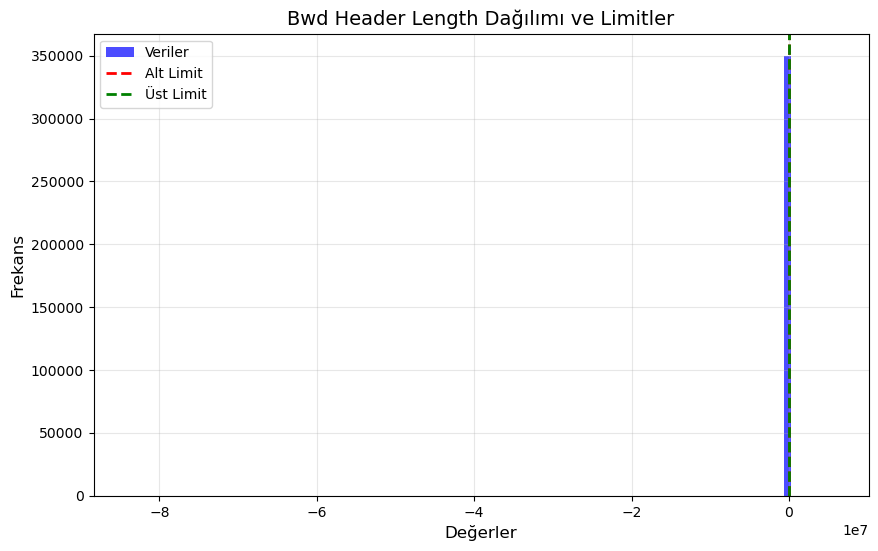

In [35]:
import matplotlib.pyplot as plt

# Veriyi al
data = df_new[" Bwd Header Length"]

# Histogram grafiği çiz
plt.figure(figsize=(10, 6))
plt.hist(data, bins=100, color='blue', alpha=0.7, label="Veriler")

# Alt ve üst limit çizgilerini ekle
plt.axvline(x=alt_limit_BwdHeaderLength, color='red', linestyle='--', linewidth=2, label="Alt Limit")
plt.axvline(x=ust_limit_BwdHeaderLength, color='green', linestyle='--', linewidth=2, label="Üst Limit")

# Grafiği düzenle
plt.title("Bwd Header Length Dağılımı ve Limitler", fontsize=14)
plt.xlabel("Değerler", fontsize=12)
plt.ylabel("Frekans", fontsize=12)
plt.legend()
plt.grid(alpha=0.3)

# Grafiği göster
plt.show()


In [36]:
# Sınıf bazlı alt ve üst limit belirleme
unique_labels = df_new[" Label"].unique()
for label in unique_labels:
    label_data = df_new[df_new[" Label"] == label][" Bwd Header Length"]
    Q1 = label_data.quantile(0.25)
    Q3 = label_data.quantile(0.75)
    IQR = Q3 - Q1
    alt_limit = max(Q1 - (1.5 * IQR), 0)
    ust_limit = min(Q3 + (3 * IQR), 150)
    print(f"{label} Sınıfı - Alt Limit: {alt_limit}, Üst Limit: {ust_limit}")


DDoS Sınıfı - Alt Limit: 0, Üst Limit: 150
BENIGN Sınıfı - Alt Limit: 0, Üst Limit: 150
PortScan Sınıfı - Alt Limit: 20.0, Üst Limit: 20.0
Bot Sınıfı - Alt Limit: 0, Üst Limit: 150
Infiltration Sınıfı - Alt Limit: 0, Üst Limit: 150
SSH-Patator Sınıfı - Alt Limit: 0, Üst Limit: 150
FTP-Patator Sınıfı - Alt Limit: 0, Üst Limit: 150
DoS Hulk Sınıfı - Alt Limit: 0, Üst Limit: 150
DoS Slowhttptest Sınıfı - Alt Limit: 0, Üst Limit: 150
DoS GoldenEye Sınıfı - Alt Limit: 0, Üst Limit: 150
DoS slowloris Sınıfı - Alt Limit: 0, Üst Limit: 150
Heartbleed Sınıfı - Alt Limit: 65136.0, Üst Limit: 150


In [37]:
# IQR hesaplama (Standart Q1 ve Q3 kullanımı)
Q1 = df_new[" Fwd Header Length.1"].quantile(0.25)  # 1. çeyrek
Q3 = df_new[" Fwd Header Length.1"].quantile(0.75)  # 3. çeyrek
IQR_FwdHeaderLength1 = Q3 - Q1  # IQR hesaplama
 
# Alt ve üst sınırların belirlenmesi
alt_limit_FwdHeaderLength1 = Q1 - (0.6666* IQR_FwdHeaderLength1)
ust_limit_FwdHeaderLength1= Q3 + (10 * IQR_FwdHeaderLength1)
 
# Alt ve üst sınırların yazdırılması
print(f"Alt Limit: {alt_limit_FwdHeaderLength1}")
print(f"Üst Limit: {ust_limit_FwdHeaderLength1}")

Alt Limit: 0.0040000000000048885
Üst Limit: 700.0


In [38]:
alt_limit_FwdHeaderLength1 = max(0, alt_limit_FwdHeaderLength1)


In [39]:
ust_limit_FwdHeaderLength1 = min(ust_limit_FwdHeaderLength1, 150)


In [40]:
# Alt ve üst sınırların yazdırılması
print(f"Alt Limit: {alt_limit_FwdHeaderLength1}")
print(f"Üst Limit: {ust_limit_FwdHeaderLength1}")

Alt Limit: 0.0040000000000048885
Üst Limit: 150


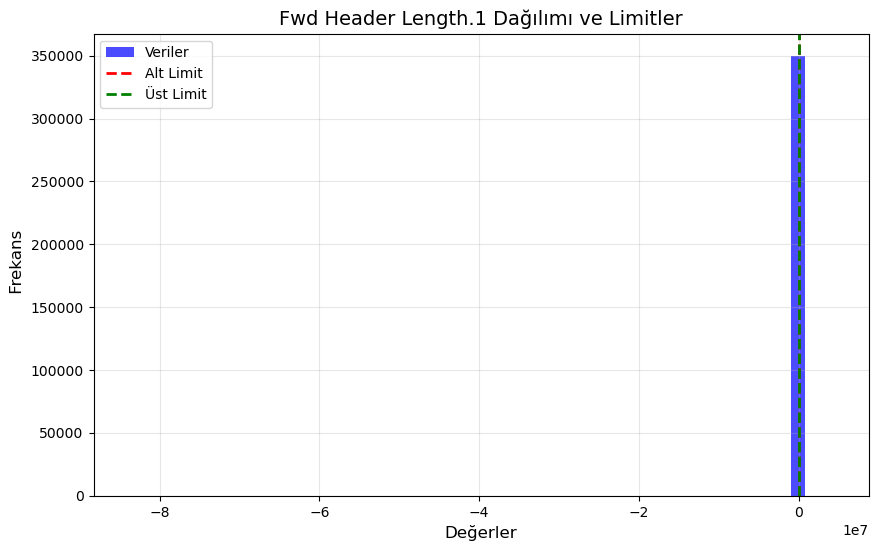

In [41]:
import matplotlib.pyplot as plt

# Veriyi ve limitleri görselleştirmek için histogram
plt.figure(figsize=(10, 6))
plt.hist(df_new[" Fwd Header Length.1"], bins=50, color='blue', alpha=0.7, label='Veriler')

# Alt ve üst limitleri dikey çizgilerle göster
plt.axvline(x=alt_limit_FwdHeaderLength1, color='red', linestyle='--', linewidth=2, label='Alt Limit')
plt.axvline(x=ust_limit_FwdHeaderLength1, color='green', linestyle='--', linewidth=2, label='Üst Limit')

# Grafik başlık ve etiketleri
plt.title("Fwd Header Length.1 Dağılımı ve Limitler", fontsize=14)
plt.xlabel("Değerler", fontsize=12)
plt.ylabel(" Frekans", fontsize=12)
plt.legend()
plt.grid(alpha=0.3)
plt.show()


In [42]:
# IQR hesaplama (Standart Q1 ve Q3 kullanımı)
Q1 = df_new[" Subflow Bwd Bytes"].quantile(0.25)  # 1. çeyrek
Q3 = df_new[" Subflow Bwd Bytes"].quantile(0.75)  # 3. çeyrek
IQR_SubflowBwdBytes = Q3 - Q1  # IQR hesaplama
 
# Alt ve üst sınırların belirlenmesi
alt_limit_SubflowBwdBytes = Q1 - (0.6666* IQR_SubflowBwdBytes)
ust_limit_SubflowBwdBytes= Q3 + (3 * IQR_SubflowBwdBytes)
 
# Alt ve üst sınırların yazdırılması
print(f"Alt Limit: {alt_limit_SubflowBwdBytes}")
print(f"Üst Limit: {ust_limit_SubflowBwdBytes}")

Alt Limit: -267.306
Üst Limit: 1646.0


In [43]:
alt_limit_SubflowBwdBytes = max(alt_limit_SubflowBwdBytes, 0)
print(f"Güncellenmiş Alt Limit: {alt_limit_SubflowBwdBytes}")

Güncellenmiş Alt Limit: 0


In [44]:
# Alt ve üst sınırların yazdırılması
print(f"Alt Limit: {alt_limit_SubflowBwdBytes}")
print(f"Üst Limit: {ust_limit_SubflowBwdBytes}")
 

Alt Limit: 0
Üst Limit: 1646.0


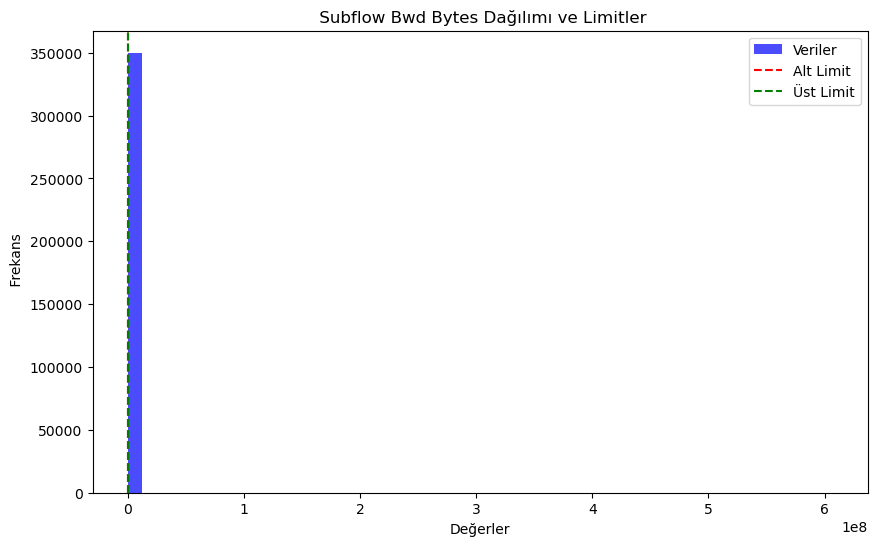

In [45]:
import matplotlib.pyplot as plt

# Histogram grafiği oluşturma
plt.figure(figsize=(10, 6))
plt.hist(df_new[" Subflow Bwd Bytes"], bins=50, color='blue', alpha=0.7, label="Veriler")

# Alt ve üst limitleri göstermek için çizgiler ekleyin
plt.axvline(x=alt_limit_SubflowBwdBytes, color='red', linestyle='--', label='Alt Limit')
plt.axvline(x=ust_limit_SubflowBwdBytes, color='green', linestyle='--', label='Üst Limit')

plt.title(" Subflow Bwd Bytes Dağılımı ve Limitler")
plt.xlabel("Değerler")
plt.ylabel(" Frekans")
plt.legend()
plt.show()


In [46]:
#min_seg_size_forward (minimum segment size forward), ağ trafiği analizinde bir bağlantı sırasında ileri yönlü (forward) veri paketlerinin
#minimum segment boyutunu ifade eder. Bu değer, bir veri bağlantısındaki paketlerin segment boyutlarının alt sınırını ölçmek için kullanılır.
# IQR hesaplama (Standart Q1 ve Q3 kullanımı)
Q1 = df_new[" min_seg_size_forward"].quantile(0.25)  # 1. çeyrek
Q3 = df_new[" min_seg_size_forward"].quantile(0.75)  # 3. çeyrek
IQR_min_seg_size_forward = Q3 - Q1  # IQR hesaplama
 
# Alt ve üst sınırların belirlenmesi
alt_limit_min_seg_size_forward = Q1 - (1.65* IQR_min_seg_size_forward)
ust_limit_min_seg_size_forward= Q3 + (10 * IQR_min_seg_size_forward)
 
# Alt ve üst sınırların yazdırılması
print(f"Alt Limit: {alt_limit_min_seg_size_forward}")
print(f"Üst Limit: {ust_limit_min_seg_size_forward}")

Alt Limit: 0.20000000000000284
Üst Limit: 152.0


In [47]:
alt_limit_min_seg_size_forward = 0
print(f"Güncellenmiş Alt Limit: {alt_limit_min_seg_size_forward}")


Güncellenmiş Alt Limit: 0


In [48]:
# Alt ve üst sınırların yazdırılması
print(f"Alt Limit: {alt_limit_min_seg_size_forward}")
print(f"Üst Limit: {ust_limit_min_seg_size_forward}")
 

Alt Limit: 0
Üst Limit: 152.0


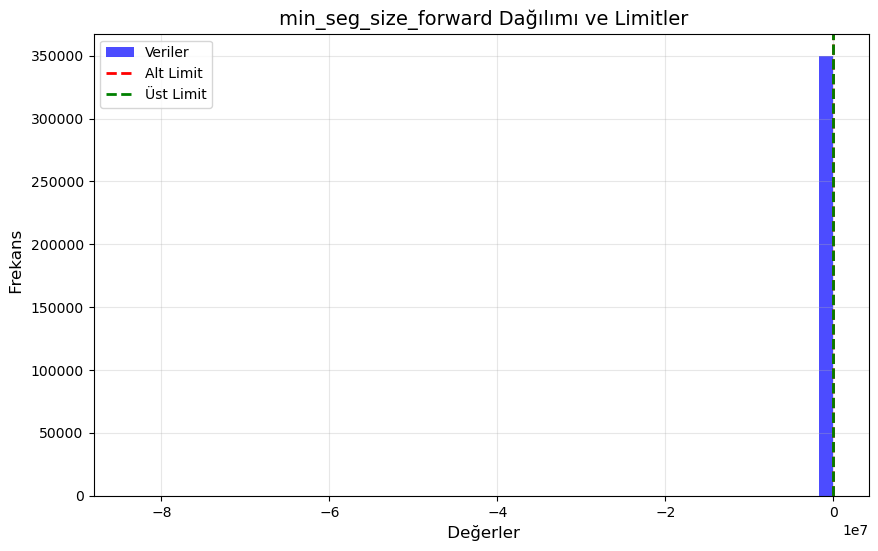

In [49]:
import matplotlib.pyplot as plt

# Histogram çizimi
plt.figure(figsize=(10, 6))
plt.hist(df_new[" min_seg_size_forward"], bins=50, color="blue", alpha=0.7, label="Veriler")

# Alt ve üst limitleri göster
plt.axvline(x=alt_limit_min_seg_size_forward, color="red", linestyle="--", linewidth=2, label="Alt Limit")
plt.axvline(x=ust_limit_min_seg_size_forward, color="green", linestyle="--", linewidth=2, label="Üst Limit")

# Grafiği özelleştir
plt.title(" min_seg_size_forward Dağılımı ve Limitler", fontsize=14)
plt.xlabel(" Değerler", fontsize=12)
plt.ylabel(" Frekans", fontsize=12)
plt.legend()
plt.grid(alpha=0.3)

# Grafiği göster
plt.show()


In [50]:
# Veri çerçevesindeki tüm sütunları listele
print(df_new.columns)


Index([' Destination Port', ' Flow Duration', ' Total Fwd Packets',
       ' Total Backward Packets', 'Total Length of Fwd Packets',
       ' Total Length of Bwd Packets', ' Fwd Packet Length Max',
       ' Fwd Packet Length Min', ' Fwd Packet Length Mean',
       ' Fwd Packet Length Std', 'Bwd Packet Length Max',
       ' Bwd Packet Length Min', ' Bwd Packet Length Mean',
       ' Bwd Packet Length Std', 'Flow Bytes/s', ' Flow Packets/s',
       ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max', ' Flow IAT Min',
       'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std', ' Fwd IAT Max',
       ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean', ' Bwd IAT Std',
       ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags', ' Bwd PSH Flags',
       ' Fwd URG Flags', ' Bwd URG Flags', ' Fwd Header Length',
       ' Bwd Header Length', 'Fwd Packets/s', ' Bwd Packets/s',
       ' Min Packet Length', ' Max Packet Length', ' Packet Length Mean',
       ' Packet Length Std', ' Packet Length Variance', '

In [51]:
df_temizlenmis = df_new[
    ((df_new[" min_seg_size_forward"] >= alt_limit_min_seg_size_forward) & (df_new[" min_seg_size_forward"] <= ust_limit_min_seg_size_forward)) &
    ((df_new[" Subflow Bwd Bytes"] >= alt_limit_SubflowBwdBytes) & (df_new[" Subflow Bwd Bytes"] <= ust_limit_SubflowBwdBytes)) &
    ((df_new[" Fwd Header Length.1"] >= alt_limit_FwdHeaderLength1) & (df_new[" Fwd Header Length.1"] <= ust_limit_FwdHeaderLength1)) &
    ((df_new[" Bwd Header Length"] >= alt_limit_BwdHeaderLength) & (df_new[" Bwd Header Length"] <= ust_limit_BwdHeaderLength)) &
    ((df_new[" Fwd Header Length"] >= alt_limit_FwdHeaderLength) & (df_new[" Fwd Header Length"] <= ust_limit_FwdHeaderLength)) &
    ((df_new["Flow Bytes/s"] >= alt_limit_FlowBytes) & (df_new["Flow Bytes/s"] <= ust_limit_FlowBytes)) &
    ((df_new[" Total Length of Bwd Packets"] >= alt_limit_TotalLengthofBwdPackets) & (df_new[" Total Length of Bwd Packets"] <= ust_limit_TotalLengthofBwdPackets))
]

In [52]:
# Sadece aykırı değerleri seçme
remaining_outliers = df_temizlenmis[
    (df_new[" min_seg_size_forward"] < alt_limit_min_seg_size_forward) | (df_new[" min_seg_size_forward"] > ust_limit_min_seg_size_forward) |
    (df_new[" Subflow Bwd Bytes"] < alt_limit_SubflowBwdBytes) | (df_new[" Subflow Bwd Bytes"] > ust_limit_SubflowBwdBytes) |
    (df_new[" Fwd Header Length.1"] < alt_limit_FwdHeaderLength1) | (df_new[" Fwd Header Length.1"] > ust_limit_FwdHeaderLength1) |
    (df_new[" Bwd Header Length"] < alt_limit_BwdHeaderLength) | (df_new[" Bwd Header Length"] > ust_limit_BwdHeaderLength) |
    (df_new[" Fwd Header Length"] < alt_limit_FwdHeaderLength) | (df_new[" Fwd Header Length"] > ust_limit_FwdHeaderLength) |
    (df_new["Flow Bytes/s"] < alt_limit_FlowBytes) | (df_new["Flow Bytes/s"] > ust_limit_FlowBytes) |
    (df_new[" Total Length of Bwd Packets"] < alt_limit_TotalLengthofBwdPackets) | (df_new[" Total Length of Bwd Packets"] > ust_limit_TotalLengthofBwdPackets)
]

print("Kalan aykırı değerler:")
print(remaining_outliers)

Kalan aykırı değerler:
Empty DataFrame
Columns: [ Destination Port,  Flow Duration,  Total Fwd Packets,  Total Backward Packets, Total Length of Fwd Packets,  Total Length of Bwd Packets,  Fwd Packet Length Max,  Fwd Packet Length Min,  Fwd Packet Length Mean,  Fwd Packet Length Std, Bwd Packet Length Max,  Bwd Packet Length Min,  Bwd Packet Length Mean,  Bwd Packet Length Std, Flow Bytes/s,  Flow Packets/s,  Flow IAT Mean,  Flow IAT Std,  Flow IAT Max,  Flow IAT Min, Fwd IAT Total,  Fwd IAT Mean,  Fwd IAT Std,  Fwd IAT Max,  Fwd IAT Min, Bwd IAT Total,  Bwd IAT Mean,  Bwd IAT Std,  Bwd IAT Max,  Bwd IAT Min, Fwd PSH Flags,  Bwd PSH Flags,  Fwd URG Flags,  Bwd URG Flags,  Fwd Header Length,  Bwd Header Length, Fwd Packets/s,  Bwd Packets/s,  Min Packet Length,  Max Packet Length,  Packet Length Mean,  Packet Length Std,  Packet Length Variance, FIN Flag Count,  SYN Flag Count,  RST Flag Count,  PSH Flag Count,  ACK Flag Count,  URG Flag Count,  CWE Flag Count,  ECE Flag Count,  Down/Up

C:\Users\dursu\AppData\Local\Temp\ipykernel_13940\385409549.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  remaining_outliers = df_temizlenmis[


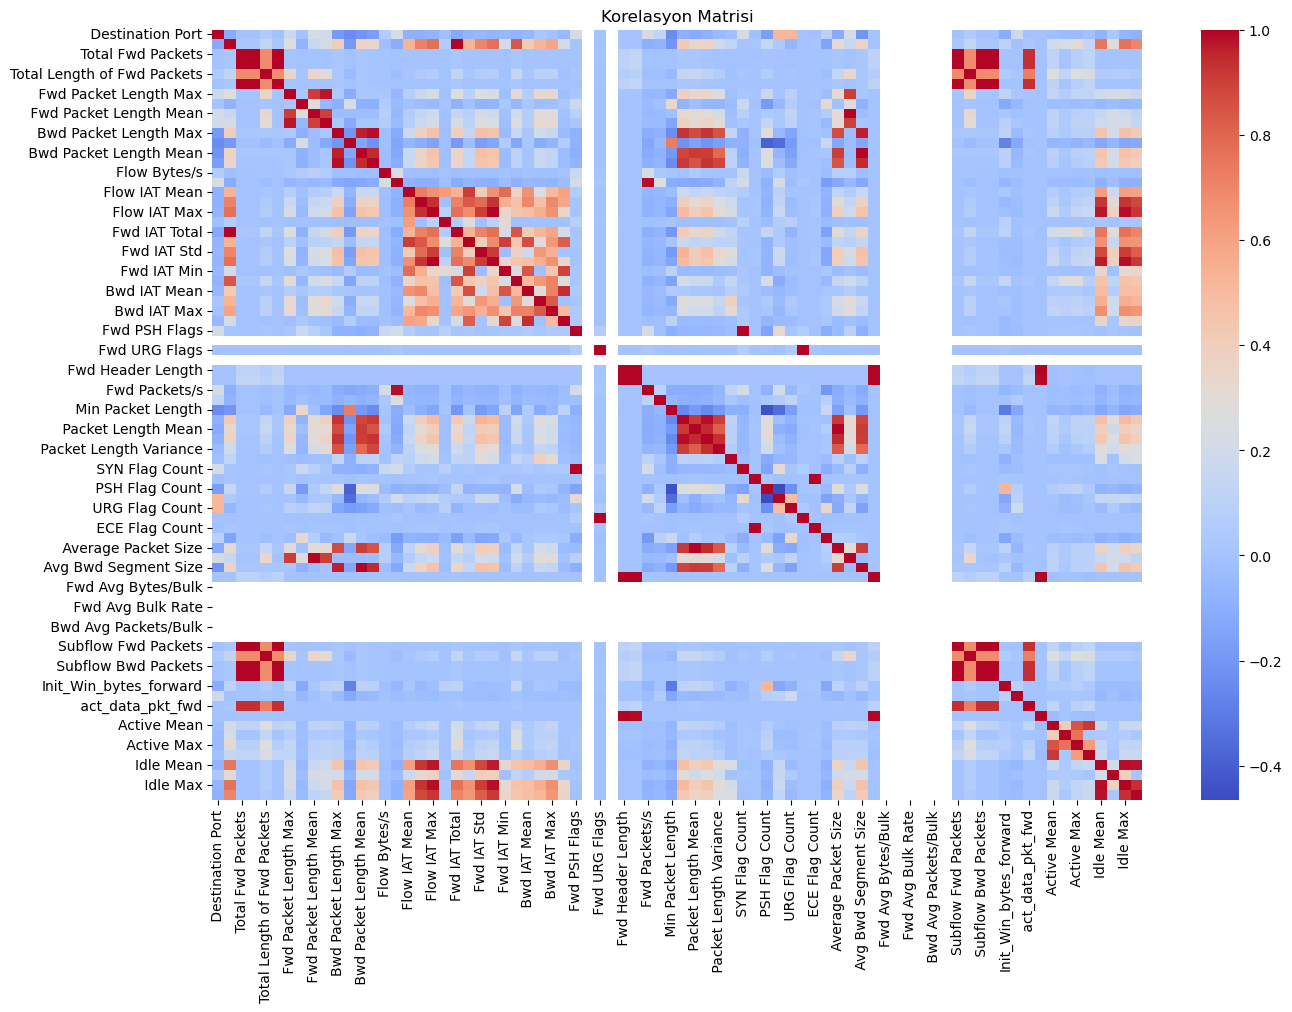

In [53]:
# Sadece sayısal sütunları seçin
numeric_columns = df_new.select_dtypes(include=['int64', 'float64']).columns
correlation_matrix = df_new[numeric_columns].corr()

# Korelasyon grafiği oluşturun
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=False, cmap="coolwarm")
plt.title("Korelasyon Matrisi")
plt.show()


In [54]:
high_correlation = correlation_matrix[(correlation_matrix > 0.9) & (correlation_matrix != 1.0)]
print(high_correlation)


                              Destination Port   Flow Duration  \
 Destination Port                          NaN             NaN   
 Flow Duration                             NaN             NaN   
 Total Fwd Packets                         NaN             NaN   
 Total Backward Packets                    NaN             NaN   
Total Length of Fwd Packets                NaN             NaN   
...                                        ...             ...   
 Active Min                                NaN             NaN   
Idle Mean                                  NaN             NaN   
 Idle Std                                  NaN             NaN   
 Idle Max                                  NaN             NaN   
 Idle Min                                  NaN             NaN   

                              Total Fwd Packets   Total Backward Packets  \
 Destination Port                           NaN                      NaN   
 Flow Duration                              NaN        

In [55]:
# Sadece sayısal sütunları seçin
numeric_columns = df_new.select_dtypes(include=['float64', 'int64']).columns
numeric_df = df_new[numeric_columns]

# Eşik değeri belirleme (örneğin 0.95)
threshold = 0.95

# Korelasyon matrisini elde et
correlation_matrix = numeric_df.corr()

# Üst üçgeni alarak çiftleri filtreleme
upper_triangle = correlation_matrix.where(
    np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool)
)

# Eşik değeri geçen çiftleri filtrele
high_correlation_pairs = upper_triangle.stack().reset_index()
high_correlation_pairs.columns = ['Feature1', 'Feature2', 'Correlation']
high_correlation_pairs = high_correlation_pairs[
    high_correlation_pairs['Correlation'].abs() > threshold
]

# Yüksek korelasyon gösteren çiftleri yazdır
print("Eşik değerini geçen yüksek korelasyonlu çiftler:")
print(high_correlation_pairs)


Eşik değerini geçen yüksek korelasyonlu çiftler:
                          Feature1                      Feature2  Correlation
87                   Flow Duration                 Fwd IAT Total     0.998375
137              Total Fwd Packets        Total Backward Packets     0.999500
139              Total Fwd Packets   Total Length of Bwd Packets     0.998172
188              Total Fwd Packets           Subflow Fwd Packets     1.000000
190              Total Fwd Packets           Subflow Bwd Packets     0.999500
191              Total Fwd Packets             Subflow Bwd Bytes     0.998149
205         Total Backward Packets   Total Length of Bwd Packets     0.998969
254         Total Backward Packets           Subflow Fwd Packets     0.999500
256         Total Backward Packets           Subflow Bwd Packets     1.000000
257         Total Backward Packets             Subflow Bwd Bytes     0.998951
320    Total Length of Fwd Packets             Subflow Fwd Bytes     1.000000
383    Total Le

In [56]:
# features_to_remove listesindeki mevcut sütunları kontrol et ve yalnızca mevcut olanları seç
features_to_remove = [
    'Subflow Fwd Packets',  # Örnek sütun
    ' Fwd Packet Length Mean',  # Örnek sütun
    ' Avg Fwd Segment Size',  # Örnek sütun
    ' Idle Min',  # Örnek sütun
    ' Flow IAT Total'  # Örnek sütun
]

# Veri çerçevesindeki mevcut sütunları seç
features_to_remove_filtered = [col for col in features_to_remove if col in df_new.columns]

# Mevcut sütunları kaldır
df_selected = df_new.drop(columns=features_to_remove_filtered)

# Kaldırılan sütunları ve kalan sütunları yazdır
print("Kaldırılan sütunlar:", features_to_remove_filtered)
print("Kalan sütunlar:", df_selected.columns)


Kaldırılan sütunlar: ['Subflow Fwd Packets', ' Fwd Packet Length Mean', ' Avg Fwd Segment Size', ' Idle Min']
Kalan sütunlar: Index([' Destination Port', ' Flow Duration', ' Total Fwd Packets',
       ' Total Backward Packets', 'Total Length of Fwd Packets',
       ' Total Length of Bwd Packets', ' Fwd Packet Length Max',
       ' Fwd Packet Length Min', ' Fwd Packet Length Std',
       'Bwd Packet Length Max', ' Bwd Packet Length Min',
       ' Bwd Packet Length Mean', ' Bwd Packet Length Std', 'Flow Bytes/s',
       ' Flow Packets/s', ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max',
       ' Flow IAT Min', 'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std',
       ' Fwd IAT Max', ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean',
       ' Bwd IAT Std', ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags',
       ' Bwd PSH Flags', ' Fwd URG Flags', ' Bwd URG Flags',
       ' Fwd Header Length', ' Bwd Header Length', 'Fwd Packets/s',
       ' Bwd Packets/s', ' Min Packet Length', ' Max Pack

In [57]:
print(df_temizlenmis[" Label"].unique())

['BENIGN' 'DDoS' 'PortScan' 'Bot' 'FTP-Patator' 'SSH-Patator' 'DoS Hulk'
 'DoS slowloris' 'DoS Slowhttptest']


In [58]:
print(df_temizlenmis[" Label"].value_counts())

 Label
BENIGN              156000
PortScan             27351
DoS Hulk               768
DDoS                   598
FTP-Patator            324
Bot                    322
DoS slowloris           45
DoS Slowhttptest        13
SSH-Patator              3
Name: count, dtype: int64


In [59]:
numeric_columns =df_temizlenmis.select_dtypes(include=['int64', 'float64']).columns


print("\nSayısal Sütunlar:", list(numeric_columns))


Sayısal Sütunlar: [' Destination Port', ' Flow Duration', ' Total Fwd Packets', ' Total Backward Packets', 'Total Length of Fwd Packets', ' Total Length of Bwd Packets', ' Fwd Packet Length Max', ' Fwd Packet Length Min', ' Fwd Packet Length Mean', ' Fwd Packet Length Std', 'Bwd Packet Length Max', ' Bwd Packet Length Min', ' Bwd Packet Length Mean', ' Bwd Packet Length Std', 'Flow Bytes/s', ' Flow Packets/s', ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max', ' Flow IAT Min', 'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std', ' Fwd IAT Max', ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean', ' Bwd IAT Std', ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags', ' Bwd PSH Flags', ' Fwd URG Flags', ' Bwd URG Flags', ' Fwd Header Length', ' Bwd Header Length', 'Fwd Packets/s', ' Bwd Packets/s', ' Min Packet Length', ' Max Packet Length', ' Packet Length Mean', ' Packet Length Std', ' Packet Length Variance', 'FIN Flag Count', ' SYN Flag Count', ' RST Flag Count', ' PSH Flag Count', ' ACK Flag 

In [60]:
import numpy as np

# Sadece sayısal sütunları seç
numeric_columns = df_temizlenmis.select_dtypes(include=[np.number])

# Sonsuz değer içeren sütunları bul
infinity_columns = numeric_columns.columns[np.isinf(numeric_columns).any()].tolist()

# Sonsuz değer içeren sütunları yazdır
if infinity_columns:
    print("Sonsuz (Infinity) değer içeren sütunlar:")
    print(infinity_columns)
else:
    print("Veride sonsuz (Infinity) değer içeren sütun bulunamadı.")


Sonsuz (Infinity) değer içeren sütunlar:
[' Flow Packets/s']


In [61]:
import numpy as np

# Sonsuz değerleri NaN ile değiştir
df_temizlenmis.loc[:, " Flow Packets/s"] = df_temizlenmis[" Flow Packets/s"].replace(
    [float('inf'), float('-inf')], np.nan
)

# NaN değerleri sütunun ortalamasıyla doldur
df_temizlenmis.loc[:, " Flow Packets/s"] = df_temizlenmis[" Flow Packets/s"].fillna(
    df_temizlenmis[" Flow Packets/s"].mean()
)

# NaN değerlerin olmadığını kontrol et
print("NaN değer sayısı:", df_temizlenmis[" Flow Packets/s"].isna().sum())


NaN değer sayısı: 0


In [62]:
df_temizlenmis[" Flow Packets/s"]=df_temizlenmis[" Flow Packets/s"].fillna(df_temizlenmis[" Flow Packets/s"].mean())
print(df_temizlenmis[" Flow Packets/s"].isna().sum())

0


C:\Users\dursu\AppData\Local\Temp\ipykernel_13940\1841054293.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temizlenmis[" Flow Packets/s"]=df_temizlenmis[" Flow Packets/s"].fillna(df_temizlenmis[" Flow Packets/s"].mean())


In [63]:
from sklearn.preprocessing import MinMaxScaler
Normalizasyon_Columns=[' Destination Port', ' Flow Duration', ' Total Fwd Packets', ' Total Backward Packets', 'Total Length of Fwd Packets', ' Total Length of Bwd Packets', ' Fwd Packet Length Max', ' Fwd Packet Length Min', ' Fwd Packet Length Mean', ' Fwd Packet Length Std', 'Bwd Packet Length Max', ' Bwd Packet Length Min', ' Bwd Packet Length Mean', ' Bwd Packet Length Std', 'Flow Bytes/s', ' Flow Packets/s', ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max', ' Flow IAT Min', 'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std', ' Fwd IAT Max', ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean', ' Bwd IAT Std', ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags', ' Bwd PSH Flags', ' Fwd URG Flags', ' Bwd URG Flags', ' Fwd Header Length', ' Bwd Header Length', 'Fwd Packets/s', ' Bwd Packets/s', ' Min Packet Length', ' Max Packet Length', ' Packet Length Mean', ' Packet Length Std', ' Packet Length Variance', 'FIN Flag Count', ' SYN Flag Count', ' RST Flag Count', ' PSH Flag Count', ' ACK Flag Count', ' URG Flag Count', ' CWE Flag Count', ' ECE Flag Count', ' Down/Up Ratio', ' Average Packet Size', ' Avg Fwd Segment Size', ' Avg Bwd Segment Size', ' Fwd Header Length.1', 'Fwd Avg Bytes/Bulk', ' Fwd Avg Packets/Bulk', ' Fwd Avg Bulk Rate', ' Bwd Avg Bytes/Bulk', ' Bwd Avg Packets/Bulk', 'Bwd Avg Bulk Rate', 'Subflow Fwd Packets', ' Subflow Fwd Bytes', ' Subflow Bwd Packets', ' Subflow Bwd Bytes', 'Init_Win_bytes_forward', ' Init_Win_bytes_backward', ' act_data_pkt_fwd', ' min_seg_size_forward', 'Active Mean', ' Active Std', ' Active Max', ' Active Min', 'Idle Mean', ' Idle Std', ' Idle Max', ' Idle Min']
scaler=MinMaxScaler()
df_temizlenmis[Normalizasyon_Columns]=scaler.fit_transform(df_temizlenmis[Normalizasyon_Columns])
print(df_temizlenmis.isnull().sum())

C:\Users\dursu\AppData\Local\Temp\ipykernel_13940\2866971582.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temizlenmis[Normalizasyon_Columns]=scaler.fit_transform(df_temizlenmis[Normalizasyon_Columns])


 Destination Port              0
 Flow Duration                 0
 Total Fwd Packets             0
 Total Backward Packets        0
Total Length of Fwd Packets    0
                              ..
Idle Mean                      0
 Idle Std                      0
 Idle Max                      0
 Idle Min                      0
 Label                         0
Length: 79, dtype: int64


In [64]:
print(df_temizlenmis.head())

     Destination Port   Flow Duration   Total Fwd Packets  \
8            0.000794        0.000626            0.000000   
24           0.000794        0.001603            0.043478   
32           0.006745        0.088007            0.173913   
55           0.001206        0.002510            0.000000   
57           0.764581        0.001817            0.217391   

     Total Backward Packets  Total Length of Fwd Packets  \
8                  0.142857                     0.005083   
24                 0.285714                     0.005514   
32                 0.857143                     0.024037   
55                 0.142857                     0.000517   
57                 0.285714                     1.000000   

     Total Length of Bwd Packets   Fwd Packet Length Max  \
8                       0.045565                0.005088   
24                      0.123937                0.002760   
32                      0.114216                0.018629   
55                      0.003645

In [65]:

df_temizlenmis = df_new  

# 'Label' sütununu 'Normal' ve 'Anomali' olarak yeniden sınıflandır
df_temizlenmis[' Label'] = df_temizlenmis[' Label'].apply(
    lambda x: 'Normal' if x == 'BENIGN' else 'Anomali'  # Şartlı atama
)

# Yeni sınıf dağılımını yazdır
print("Yeni Sınıf Dağılımı:")
print(df_temizlenmis[' Label'].value_counts())


Yeni Sınıf Dağılımı:
 Label
Normal     273616
Anomali     76384
Name: count, dtype: int64


In [66]:
from sklearn.preprocessing import LabelEncoder
Label_encoder=LabelEncoder()
df_temizlenmis[" Label"]=Label_encoder.fit_transform(df_temizlenmis[" Label"])
print(df_temizlenmis[" Label"].head)
print(df_temizlenmis[" Label"].value_counts())

<bound method NDFrame.head of 0         0
1         1
2         1
3         0
4         1
         ..
349995    1
349996    0
349997    0
349998    0
349999    1
Name:  Label, Length: 350000, dtype: int32>
 Label
1    273616
0     76384
Name: count, dtype: int64


In [67]:
# "Anomali" sınıfını seç
anomali = df_temizlenmis[df_temizlenmis[' Label'] == 0]

# Gerekli örnek sayısını hesapla
needed_samples = len(df_temizlenmis[df_temizlenmis[' Label'] == 1]) - len(anomali)

# Gerekli örnek sayısını kontrol et
if needed_samples > 0:
    # Gerekli örnekleri çoğalt (replace=True ile)
    anomaly_duplicated = anomali.sample(n=needed_samples, replace=True, random_state=42)
    
    # Veri setlerini birleştir
    df_temizlenmis = pd.concat([df_temizlenmis, anomaly_duplicated], axis=0).reset_index(drop=True)
    
    # Sonuçları kontrol et
    print("Yeni veri setindeki sınıf dağılımı:")
    print(df_temizlenmis[' Label'].value_counts())


Yeni veri setindeki sınıf dağılımı:
 Label
0    273616
1    273616
Name: count, dtype: int64


In [68]:
from sklearn.model_selection import train_test_split

# Bağımsız değişkenler (özellikler) ve hedef değişkeni ayırma
X = df_temizlenmis.drop(columns=[" Label"])  # 'Label' sütunu hedef değişken
y = df_temizlenmis[" Label"]  # Hedef değişken

# Eğitim ve test setine bölme
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Eğitim ve test seti başarıyla bölündü.")


Eğitim ve test seti başarıyla bölündü.


In [69]:
import numpy as np

print("Eksik değer sayısı:", X_train.isna().sum().sum())
print("Sonsuz değer var mı?:", np.isinf(X_train).values.any())


Eksik değer sayısı: 0
Sonsuz değer var mı?: True


In [70]:
X_train = X_train.replace([np.inf, -np.inf], np.nan)  # İlk olarak sonsuz değerleri NaN ile değiştir
X_train = X_train.fillna(X_train.mean())  # NaN değerleri sütunların ortalama değeriyle doldur



In [71]:
import numpy as np

print("Eksik değer sayısı:", X_train.isna().sum().sum())
print("Sonsuz değer var mı?:", np.isinf(X_train).values.any())

Eksik değer sayısı: 0
Sonsuz değer var mı?: False


In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Veri alt kümesi oluşturma
X_train_sampled = X_train.sample(n=5000, random_state=42)
y_train_sampled = y_train[X_train_sampled.index]

# SVM modeli tanımlama
svm_model = SVC(kernel='linear', probability=True, random_state=42)  # Linear kernel hızlıdır.

# Modeli eğitim verileriyle eğitme
svm_model.fit(X_train_sampled, y_train_sampled)

# Tahminler
y_pred_svm = svm_model.predict(X_test)
y_prob_svm = svm_model.predict_proba(X_test)[:, 1]

# Performans değerlendirmesi
print("SVM Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_svm))

print("\nSVM Classification Report:")
print(classification_report(y_test, y_pred_svm))

roc_auc_svm = roc_auc_score(y_test, y_prob_svm)
print(f"\nSVM ROC AUC Score: {roc_auc_svm:.4f}")

# ROC eğrisi çizimi
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_prob_svm)
plt.figure(figsize=(10, 6))
plt.plot(fpr_svm, tpr_svm, label=f"SVM (AUC = {roc_auc_svm:.2f})", color='orange')
plt.plot([0, 1], [0, 1], linestyle='--', color='navy')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('SVM ROC Curve')
plt.legend(loc="lower right")
plt.grid()
plt.show()
